In [108]:
import Stemmer
import json
from itertools import combinations
from itertools import product
import re
import string
import nltk
import numpy as np
import matplotlib.pyplot as plt

In [109]:
def clean(text):
    text = text.lower()
    text = re.sub(f"([{string.punctuation}–«»])", " ", text)
    text = re.sub("\d+", " ", text)
    text = re.sub("\n", "", text)
    text = re.sub("\s\s+", " ", text)[:-1]
    return text

In [110]:
def ui(file, lang, extra=False):
    with open(file, 'r', encoding='utf-8') as f:
        text = json.load(f)
    
    stemmer = Stemmer.Stemmer(lang)
    
    gumt = 0
    gdmt = 0
    for key, value in text.items():
        dmt = len(list(combinations(value,2)))
        umt = 0
        
        for pair in list(combinations(value,2)):
            if stemmer.stemWord(pair[0]) != stemmer.stemWord(pair[1]):
                umt += 1
        
        gumt += umt
        gdmt += dmt
    
    ui = gumt/gdmt
    if extra:
        print("ui =", ui)
    return ui

In [111]:
def oi(file, lang, extra=False):
    with open(file, 'r', encoding='utf-8') as f:
        text = json.load(f)
    
    stemmer = Stemmer.Stemmer(lang)
    pairs = [(key, value) for key, values in text.items() for value in values]
    
    gwmt = 0
    gdnt = 0
    
    for pair in list(combinations(pairs,2)):
        if pair[0][0] != pair[1][0]:
            gdnt += 1
            if stemmer.stemWord(pair[0][1]) == stemmer.stemWord(pair[1][1]):
                gwmt += 1
    
    oi = gwmt/gdnt
    if extra:
        print("oi =", oi)
    return oi

In [112]:
def sw(file, lang, extra=False):
    sw = oi(file, lang) / ui(file, lang)
    if extra:
        print("sw =", sw)
    return sw

In [113]:
def icf(file, lang, stopword=False, extra=False): 
    with open(file, 'r', encoding='utf-8') as f:
        text = f.readlines()
    stemmer = Stemmer.Stemmer(lang)
    
    cl_text = ''
    for line in text:
        cl_text += line + " "
    N = clean(cl_text).split(" ")
    
    if stopword:
        stopwords = nltk.corpus.stopwords.words(lang)
        text_tokens = [token.strip() for token in N if token not in stopwords]
        tokens = nltk.Text(text_tokens)
        N = list()
        for w in tokens:
            N.append(w)
    
    icf_list = list()
    x = np.arange(len(N)//10, len(N)+len(N)//10, len(N)//10)
    for i in x:
        N_cur = N[0:i]
        S = set(stemmer.stemWords(N_cur))
        icf = (len(set(N_cur)) - len(S)) / len(set(N_cur))
        icf_list.append(icf)
    
    if extra:
        print("icf =", icf, "(stopwords:", stopword,")")
    return icf_list, x

In [114]:
def mwc(file, lang, stopword=False, extra=False): 
    with open(file, 'r', encoding='utf-8') as f:
        text = f.readlines()
    stemmer = Stemmer.Stemmer(lang)
    
    cl_text = ''
    for line in text:
        cl_text += line + " "
    N = clean(cl_text).split(" ")
    if stopword:
        stopwords = nltk.corpus.stopwords.words(lang)
        text_tokens = [token.strip() for token in N if token not in stopwords]
        tokens = nltk.Text(text_tokens)
        N = list()
        for w in tokens:
            N.append(w)
    mwc_list = list()
    x = np.arange(len(N)//10, len(N)+len(N)//10, len(N)//10)
    for i in x:
        N_cur = N[0:i]
        S = set(stemmer.stemWords(N_cur))
        mwc = len(set(N_cur)) / len(S)
        mwc_list.append(mwc)
    
    if extra:
        print("mwc =", mwc, "(stopwords:", stopword,")")
    return mwc_list

# Russian

In [115]:
ui('ru_1.json', 'russian', True)
oi('ru_1.json', 'russian', True)
sw('ru_1.json', 'russian', True)
mwc_rus_sw = mwc('ru_2.txt', 'russian', True, True)
mwc_rus = mwc('ru_2.txt', 'russian', False, True)
icf_rus_sw, x_rus_sw = icf('ru_2.txt', 'russian', True, True)
icf_rus, x_rus = icf('ru_2.txt', 'russian', False, True);

ui = 0.363395225464191
oi = 0.04470426409903714
sw = 0.12301830339662044
mwc = 1.2562225475841875 (stopwords: True )
mwc = 1.2641752577319587 (stopwords: False )
icf = 0.20396270396270397 (stopwords: True )
icf = 0.2089704383282365 (stopwords: False )


# English

In [116]:
ui('eng_1.json', 'english', True)
oi('eng_1.json', 'english', True)
sw('eng_1.json', 'english', True)
mwc_eng_sw = mwc('eng_2.txt', 'english', True, True)
mwc_eng = mwc('eng_2.txt', 'english', False, True)
icf_eng_sw, x_eng_sw = icf('eng_2.txt', 'english', True, True)
icf_eng, x_eng = icf('eng_2.txt', 'english', False, True);

ui = 0.555
oi = 0.0
sw = 0.0
mwc = 1.0598705501618122 (stopwords: True )
mwc = 1.058321479374111 (stopwords: False )
icf = 0.05648854961832061 (stopwords: True )
icf = 0.05510752688172043 (stopwords: False )


In [117]:
"""
plt.figure(figsize=(10,8))
    plt.plot(x, icf_list)
    plt.xlabel("Кол-о слов")
    plt.ylabel("ICF")
    for i in range(len(x)): 
        plt.annotate("{:.3}".format(icf_list[i]), (x[i], icf_list[i]))
"""

'\nplt.figure(figsize=(10,8))\n    plt.plot(x, icf_list)\n    plt.xlabel("Кол-о слов")\n    plt.ylabel("ICF")\n    for i in range(len(x)): \n        plt.annotate("{:.3}".format(icf_list[i]), (x[i], icf_list[i]))\n'

In [118]:
def plot(title, labels, lists, xs):
    plt.figure(figsize=(15,8))
    plt.xlabel("Кол-о слов")
    plt.ylabel(title)
    
    for l,y,x in zip(labels,lists, xs):
        plt.plot(x, y, label=l)
        for i in range(len(y)): 
            plt.annotate("{:.3}".format(y[i]), (x[i], y[i]))
    
    plt.legend()

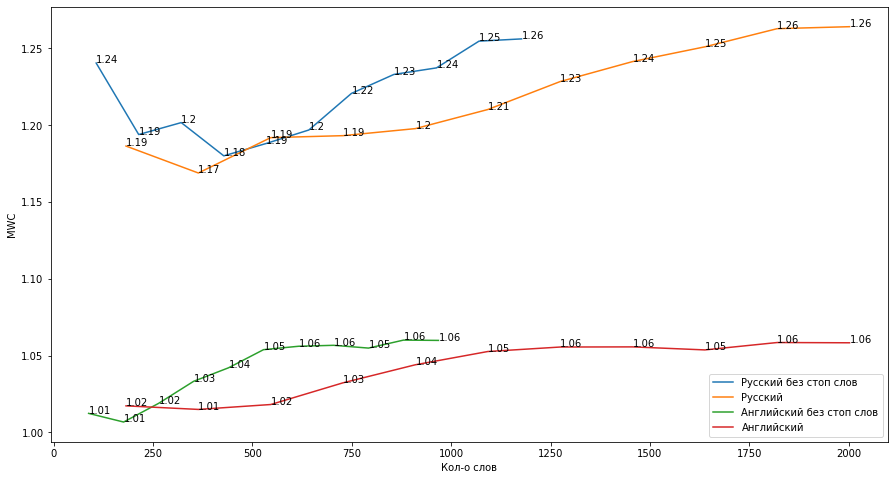

In [119]:
plot("MWC", ["Русский без стоп слов", "Русский", "Английский без стоп слов", "Английский"], 
     [mwc_rus_sw, mwc_rus, mwc_eng_sw, mwc_eng], [x_rus_sw, x_rus, x_eng_sw, x_eng])

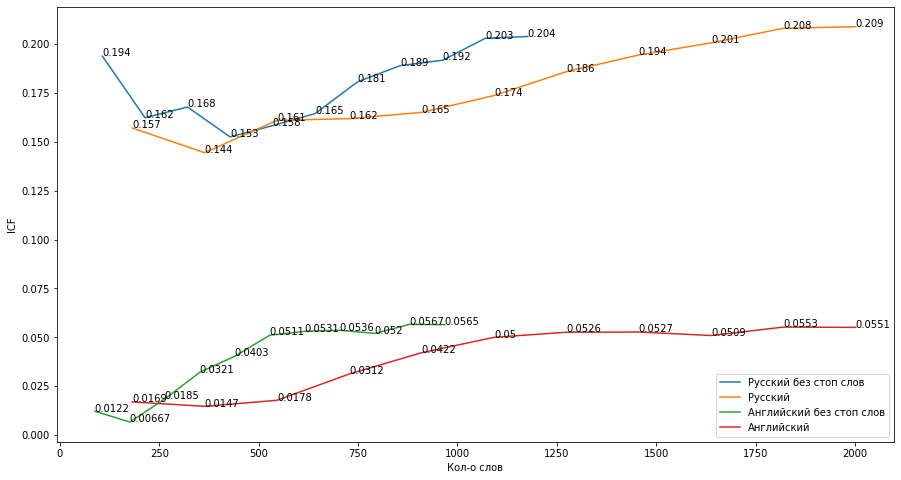

In [120]:
plot("ICF", ["Русский без стоп слов", "Русский", "Английский без стоп слов", "Английский"], 
     [icf_rus_sw, icf_rus, icf_eng_sw, icf_eng], [x_rus_sw, x_rus, x_eng_sw, x_eng])